# Kidney Disease Prediction
This project focuses on predicting kidney disease using machine learning models. A publicly available dataset was explored, preprocessed, and analyzed to build a classification system capable of distinguishing between patients with and without kidney disease. The approach involves data cleaning, normalization, model training, and result interpretation.

Installing initial important packages, if required

In [ ]:
# Install all the required packages if not already installed
#!pip install -q kaggle
#!pip install tabulate
#!pip install seaborn
#!pip install xgboost
#!pip install sklearn
#!pip install matplotlib
#!pip install pandas
#!pip install numpy


# 1. Data Source Selection

This script sets up Kaggle API access in a Google Colab environment to programmatically download datasets. After uploading the kaggle.json credentials file, permissions are configured, and the Kidney Disease Dataset is downloaded from Kaggle and extracted for further analysis.

In [1]:
# Upload kaggle.json (API credentials)
from google.colab import files
files.upload()  # Upload your kaggle.json here manually when prompted

# Set up Kaggle API credentials
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

# Download the Diabetes Risk Dataset from Kaggle
#!kaggle datasets download -d smayanj/diabetes-risk-dataset

# Download the Kidney diseases dataset
!kaggle datasets download -d amanik000/kidney-disease-dataset

# Unzip the downloaded dataset
!unzip -q kidney-disease-dataset.zip

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/amanik000/kidney-disease-dataset
License(s): unknown
  0% 0.00/1.94M [00:00<?, ?B/s]
100% 1.94M/1.94M [00:00<00:00, 136MB/s]


# 2. Choice of Frameworks

This script imports all the necessary libraries and modules required for data manipulation, visualization, preprocessing, and machine learning model building. It leverages powerful tools such as NumPy and Pandas for data handling, Seaborn and Matplotlib for plotting, and various machine learning models from scikit-learn and XGBoost for classification tasks. Additionally, utilities for evaluation metrics, data splitting, and type hinting are incorporated to enhance clarity and structure in the workflow. These libraries collectively form the backbone of the kidney disease prediction pipeline developed in this project.

**License**:
Details about the licenses for the external libraries used in this script are provided below, in accordance with their respective usage terms.

In [2]:
# Import core libraries for numerical and data manipulation
import numpy as np  # Provides support for large, multi-dimensional arrays and matrices
import pandas as pd  # Provides data structures and functions for data analysis and manipulation

# Optional typing utilities
from typing import Optional  # Allows defining optional type hints for function arguments and returns

# Tabular display utility
from tabulate import tabulate  # Used to print tabular data in a clean, formatted table

# Visualization libraries
import matplotlib.pyplot as plt  # Low-level plotting library for creating figures and visualizations
import seaborn as sns  # High-level data visualization library built on top of matplotlib

# More type hints
from typing import List, Dict  # Used for more specific type annotations (e.g., List[str], Dict[str, float])

# Machine learning utilities
from sklearn.model_selection import train_test_split  # Splits data into training and testing sets
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Evaluation metrics

# Preprocessing tools
from sklearn.preprocessing import LabelEncoder, MinMaxScaler  # Encode labels & scale feature values

# Import classification models from scikit-learn
from sklearn.ensemble import (
    RandomForestClassifier,     # Random Forest algorithm for classification
    AdaBoostClassifier,         # Adaptive Boosting classifier
    GradientBoostingClassifier  # Gradient Boosting classifier
)

# Additional classifiers
from sklearn.linear_model import LogisticRegression  # Logistic regression classifier
from sklearn.svm import SVC  # Support Vector Classifier

# Import external gradient boosting library
from xgboost import XGBClassifier  # Extreme Gradient Boosting classifier from XGBoost library



# Third-Party Library Licenses

This project uses the following open-source Python libraries. Below is a summary of each library and its respective license based on standard software development practices.


### Core Libraries

#### [NumPy](https://numpy.org/)
- **License**: BSD 3-Clause License
- **Description**: Fundamental package for scientific computing with suppor for arrays, matrices, and mathematical functions.

#### [pandas](https://pandas.pydata.org/)
- **License**: BSD 3-Clause License
- **Description**: Powerful data structures for data manipulation and analysis.

### Typing Utilities

#### [typing (built-in)](https://docs.python.org/3/library/typing.html)
- **License**: Python Software Foundation (PSF) License
- **Description**: Provides type hints used in function annotations (e.g., `Optional`, `List`, `Dict`).

### Visualization Libraries

#### [matplotlib](https://matplotlib.org/)
- **License**: PSF-based (compatible with BSD)
- **Description**: Comprehensive library for static, animated, and interactive visualizations.

#### [seaborn](https://seaborn.pydata.org/)
- **License**: BSD 3-Clause License
- **Description**: Statistical data visualization built on top of matplotlib.

### Tabular Output

#### [tabulate](https://pypi.org/project/tabulate/)
- **License**: MIT License
- **Description**: Formats tabular data with plain-text tables.

### Machine Learning

#### [scikit-learn](https://scikit-learn.org/)
- **License**: BSD 3-Clause License
- **Description**: Machine learning in Python with tools for classification, regression, clustering, and more.

Includes:
- `train_test_split`
- `accuracy_score`
- `classification_report`
- `confusion_matrix`
- `LabelEncoder`
- `MinMaxScaler`
- `GradientBoostingClassifier`
- `LogisticRegression`

###Gradient Boosting

#### [XGBoost](https://xgboost.readthedocs.io/)
- **License**: Apache License 2.0
- **Description**: Scalable, distributed gradient-boosted decision trees.

### Summary Table

| Library           | License            |
|-------------------|--------------------|
| NumPy             | BSD 3-Clause       |
| pandas            | BSD 3-Clause       |
| typing (built-in) | PSF License        |
| tabulate          | MIT License        |
| matplotlib        | PSF / BSD          |
| seaborn           | BSD 3-Clause       |
| scikit-learn      | BSD 3-Clause       |
| XGBoost           | Apache 2.0         |



# 3. Loading the data

In [11]:
# Checking the data information
data = pd.read_csv("kidney_disease_dataset.csv")
data.head()


,Age of the patient,Blood pressure (mm/Hg),Specific gravity of urine,Albumin in urine,Sugar in urine,Red blood cells in urine,Pus cells in urine,Pus cell clumps in urine,Bacteria in urine,Random blood glucose level (mg/dl),...,Smoking status,Body Mass Index (BMI),Physical activity level,Duration of diabetes mellitus (years),Duration of hypertension (years),Cystatin C level,Urinary sediment microscopy results,C-reactive protein (CRP) level,Interleukin-6 (IL-6) level,Target
0,54,167,1.023,1,4,normal,abnormal,not present,not present,96,...,yes,25.3,low,4,16,0.67,normal,4.88,10.23,No_Disease
1,42,127,1.023,3,2,normal,normal,not present,present,73,...,no,20.6,moderate,3,13,0.55,abnormal,4.49,13.11,Low_Risk
2,38,148,1.016,0,0,abnormal,normal,not present,not present,77,...,no,38.4,high,11,23,2.37,abnormal,4.57,13.27,No_Disease
3,7,98,1.017,4,0,abnormal,normal,not present,present,225,...,no,24.7,high,24,3,2.54,abnormal,8.57,12.36,No_Disease
4,67,174,1.015,1,1,normal,abnormal,not present,not present,376,...,yes,17.6,high,22,24,1.90,normal,6.75,1.46,No_Disease


# 4. Cleaning the data

The 'KidneyDataCleaner' class is designed to streamline and automate the data cleaning process for this kidney disease dataset. The motivation behind this cleaning pipeline lies in addressing the common issues encountered in medical datasets, such as *inconsistent formatting*, *missing values*, *categorical ambiguity*, and *duplicated records that can adversely affect machine learning model performance*.

This class performs several critical preprocessing tasks:
- loading the dataset,
- standardizing column names for consistency,
- reporting and optionally removing missing values,
- identifying duplicate records, and
- encoding binary categorical variables into numerical format.

The class also provides tabular summaries of data structure and a sample preview of the cleaned output. Overall, it produces a well-structured and sanitized dataset ready for analysis or model training.

In [3]:
# Functions and classes for data cleaning tasks

class KidneyDataCleaner:
    """
    A class to clean and preprocess kidney disease datasets with tabular reporting.
    """

    def __init__(self, file_path: str):
        """
        Initialize the KidneyDataCleaner class with a file path.
        Args:
            file_path (str): Path to the dataset file (CSV).
        """
        self.file_path = file_path  # Path to the dataset file
        self.df: Optional[pd.DataFrame] = None  # Dataframe will hold the loaded dataset

    def load_dataset(self) -> pd.DataFrame:
        """
        Load the dataset from the provided file path.
        Returns:
            pd.DataFrame: Loaded dataset.
        """
        self.df = pd.read_csv(self.file_path)  # Read the CSV file into a DataFrame
        print(f"\n 1. Dataset loaded. Shape: {self.df.shape}")  # Print shape of the loaded dataset
        return self.df  # Return the DataFrame

    def standardize_column_names(self) -> None:
        """
        Standardize column names by:
        - Stripping any extra spaces
        - Converting to lowercase
        - Replacing spaces with underscores
        - Removing any parentheses and special characters
        """
        if self.df is not None:  # Ensure the DataFrame is loaded
            self.df.columns = (
                self.df.columns
                .str.strip()  # Remove leading and trailing spaces
                .str.lower()  # Convert column names to lowercase
                .str.replace(' ', '_')  # Replace spaces with underscores
                .str.replace('[()]', '', regex=True)  # Remove parentheses and special characters
            )

    def report_missing_values(self, drop_rows: bool = False) -> None:
        """
        Report missing values for each column and optionally drop rows with missing data.
        Args:
            drop_rows (bool): Whether to drop rows with missing values.
        """
        if self.df is not None:  # Ensure the DataFrame is loaded
            missing_df = self.df.isnull().sum().reset_index()  # Calculate missing values per column
            missing_df.columns = ['Column', 'Missing Values']  # Rename columns for readability
            missing_df = missing_df[missing_df['Missing Values'] > 0]  # Filter out columns with no missing values
            if not missing_df.empty:  # Check if there are any missing values
                print("\n Missing Values:")
                print(tabulate(missing_df, headers='keys', tablefmt='pretty'))  # Print missing value table
            else:
                print("\n No missing values found.")  # Print message if no missing values are found
            if drop_rows:  # Optionally drop rows with missing values
                self.df.dropna(inplace=True)  # Drop rows with missing values
                print(f" Dropped rows with missing values. New shape: {self.df.shape}")  # Print new shape

    def encode_binary_categoricals(self) -> None:
        """
        Convert binary categorical columns ('yes', 'no', 'good', 'poor') to 1/0 numeric values.
        """
        if self.df is not None:  # Ensure the DataFrame is loaded
            for col in self.df.columns:  # Loop through all columns in the DataFrame
                if self.df[col].nunique() <= 3 and self.df[col].dtype == object:  # Check if column is binary
                    # Replace 'yes'/'no'/'good'/'poor' with 1/0
                    self.df[col] = self.df[col].str.strip().str.lower().replace({
                        'yes': 1, 'no': 0, 'good': 1, 'poor': 0
                    })

    def report_duplicates(self) -> int:
        """
        Report the number of duplicate rows in the dataset.
        Returns:
            int: Number of duplicate rows.
        """
        if self.df is not None:  # Ensure the DataFrame is loaded
            dupes = self.df.duplicated().sum()  # Calculate number of duplicate rows
            print(f"\n 2. Duplicate Rows Found: {dupes}")  # Print the number of duplicates
            return dupes  # Return the number of duplicate rows
        return 0  # Return 0 if the DataFrame is None

    def print_clean_summary(self) -> None:
        """
        Print a summary of the dataset columns, their data types, and the number of unique values per column.
        """
        if self.df is not None:  # Ensure the DataFrame is loaded
            print("\n 3. Column Summary:")
            dtypes_df = pd.DataFrame({
                'Column': self.df.columns,  # Column names
                'Data Type': self.df.dtypes.values,  # Data types of columns
                'Unique Values': [self.df[col].nunique() for col in self.df.columns]  # Unique values count
            })
            print(tabulate(dtypes_df, headers='keys', tablefmt='github'))  # Print the column summary in a table

    def run_cleaning_pipeline(self, drop_missing: bool = False) -> pd.DataFrame:
        """
        Run the complete data cleaning pipeline:
        - Load dataset
        - Standardize column names
        - Report and handle missing values
        - Report duplicates
        - Encode binary categorical columns
        - Print the cleaned data summary
        Args:
            drop_missing (bool): Whether to drop rows with missing data.
        Returns:
            pd.DataFrame: Cleaned dataset.
        """
        # Run all the data cleaning steps in sequence
        self.load_dataset()  # Load the dataset
        self.standardize_column_names()  # Standardize column names
        self.report_missing_values(drop_rows=drop_missing)  # Report missing values and drop rows if specified
        self.report_duplicates()  # Report duplicate rows
        self.encode_binary_categoricals()  # Encode binary categorical columns
        self.standardize_column_names()  # Reapply column name standardization after encoding
        self.print_clean_summary()  # Print the cleaned dataset summary

        # Display a sample of the cleaned data
        print("\n Sample Cleaned Data (Head):")
        print(tabulate(self.df.head(), headers='keys', tablefmt='grid', showindex=False))  # Print the head of the cleaned data

        return self.df  # Return the cleaned dataset


# 5. Fundamental Exploration

The explore_fundamentals function is a utility designed to perform comprehensive exploratory data analysis (EDA) on any given dataset. The motivation behind this function is to enable a quick, structured overview of key characteristics across different data types—numerical, categorical, datetime, and others—before deeper modeling or processing begins.

For numerical features, the function computes essential statistics such as minimum, maximum, mean, standard deviation, and the corresponding row indices where extreme values occur. For categorical columns, it provides frequency distributions of category values. For datetime columns, it summarizes the date range, timespan, and average event frequency. Any remaining columns with unrecognized types are summarized by data type and uniqueness.

The output, presented in neatly formatted tables using the tabulate library, gives data scientists a clear and immediate understanding of dataset structure, aiding in informed decision-making for subsequent steps such as feature engineering or cleaning.

In [4]:
#Fundamental data exploration

def explore_fundamentals(df: pd.DataFrame) -> None:
    """
    Perform fundamental exploration of a dataset.

    This function calculates and displays basic statistical summaries for the given dataset, including:
    - For numerical columns: min, max, mean, std, and where min/max occur
    - For categorical columns: frequency of each category
    - For datetime columns: min, max, timespan, and average event frequency
    - For other columns: type summary (data type and unique value count)

    Args:
        df (pd.DataFrame): The input dataframe containing the dataset to explore.
    """
    print("\n Fundamental Data Exploration:\n")  # Print heading for exploration

    # Separate columns by dtype
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns  # Numerical columns (int and float types)
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns  # Categorical columns (object or category types)
    datetime_cols = df.select_dtypes(include=['datetime64']).columns  # DateTime columns (datetime64 type)
    other_cols = [col for col in df.columns if col not in numerical_cols and col not in categorical_cols and col not in datetime_cols]  # Other non-categorized columns

    # Numerical Summary
    print(" Numerical Summary:")  # Print heading for numerical summary
    rows = []  # Initialize an empty list to store the summary of numerical columns
    for col in numerical_cols:  # Loop through each numerical column
        col_min = df[col].min()  # Find the minimum value
        col_max = df[col].max()  # Find the maximum value
        idx_min = df[col].idxmin()  # Find the index where the minimum value occurs
        idx_max = df[col].idxmax()  # Find the index where the maximum value occurs
        mean = df[col].mean()  # Calculate the mean of the column
        std = df[col].std()  # Calculate the standard deviation of the column
        rows.append([  # Append the statistics of the current column to the rows list
            col, f"{col_min:.2f}", f"{col_max:.2f}", mean, std, idx_min, idx_max
        ])
    # Print the numerical summary in a tabular format using tabulate
    print(tabulate(rows, headers=['Column', 'Min', 'Max', 'Mean', 'Std Dev', 'Min Row', 'Max Row'], tablefmt='github'))

    # Categorical Summary
    print("\n Categorical Summary:")  # Print heading for categorical summary
    for col in categorical_cols:  # Loop through each categorical column
        print(f"\nColumn: {col}")  # Print the column name
        freq = df[col].value_counts().reset_index()  # Get the frequency of each category in the column
        freq.columns = [col, 'Count']  # Rename the columns for readability
        print(tabulate(freq, headers='keys', tablefmt='pretty'))  # Print the frequency table

    # DateTime Summary
    if len(datetime_cols) > 0:  # Check if there are any datetime columns
        print("\n DateTime Summary:")  # Print heading for datetime summary
        for col in datetime_cols:  # Loop through each datetime column
            min_date = df[col].min()  # Find the earliest date
            max_date = df[col].max()  # Find the latest date
            span = max_date - min_date  # Calculate the time span between min and max dates
            freq = df[col].value_counts().mean()  # Calculate the average frequency of events in the datetime column
            print(f"Column: {col}")  # Print the column name
            print(f"  ➤ From: {min_date}")  # Print the earliest date
            print(f"  ➤ To:   {max_date}")  # Print the latest date
            print(f"  ➤ Span: {span}")  # Print the time span between min and max dates
            print(f"  ➤ Avg events/day: {freq:.2f}\n")  # Print the average number of events per day
    else:
        print("\n No datetime columns detected.")  # Print message if no datetime columns found

    # Other Column Types
    if other_cols:  # Check if there are any columns that are not numerical, categorical, or datetime
        print("\n Other Column Types:")  # Print heading for other column types
        for col in other_cols:  # Loop through each other column
            print(f"{col}: dtype={df[col].dtype}, unique={df[col].nunique()}")  # Print column name, data type, and number of unique values




# 6. Visualization (and Risk Analysis)

The 'KidneyRiskAnalyzer' class provides a data-driven approach to quantify individual patient risk for kidney disease by leveraging feature importance extracted from a trained Random Forest model. Designed for interpretability and patient-level analysis, this class identifies the most critical features influencing the disease outcome and assigns personalized risk scores based on a weighted combination of normalized feature values.

The implementation involves preprocessing numeric features, training a classifier to estimate feature relevance, computing risk scores via weighted feature contributions, and visualizing the top contributing risk factors. This makes the tool highly valuable for both clinical insights and data exploration in kidney disease research.

In [ ]:
# Risk Analysis

class KidneyRiskAnalyzer:
    """
    Analyze kidney disease risk using feature importance and patient data.

    Attributes:
        data (pd.DataFrame): Preprocessed dataset
        target_column (str): Column name containing labels (e.g., 'Target')
        features (List[str]): List of features to include in risk calculation
        model (RandomForestClassifier): Trained model for feature importance
    """

    def __init__(self, data: pd.DataFrame, target_column: str):
        # Initialize the analyzer with the dataset and target label
        self.data = data.copy()  # Make a copy of the data to avoid modifying the original
        self.target_column = target_column  # Store the name of the target column

        # Select numeric feature columns excluding the target
        self.features = [col for col in data.columns if col != target_column and pd.api.types.is_numeric_dtype(data[col])]

        # Initialize a Random Forest model for learning feature importance
        self.model = RandomForestClassifier(n_estimators=100, random_state=42)

        # Encoder for transforming categorical target labels into numerical values
        self.encoder = LabelEncoder()

    def train_model(self) -> None:
        """
        Train a random forest model to learn feature importance.
        """
        # Prepare feature matrix X and encoded target vector y
        X = self.data[self.features]
        y = self.encoder.fit_transform(self.data[self.target_column])

        # Train the Random Forest model
        self.model.fit(X, y)
        print("Model trained for feature importance extraction.")

    def compute_feature_importance(self) -> pd.Series:
        """
        Return feature importance as a pandas Series.
        """
        # Extract feature importances from the trained model
        importances = pd.Series(self.model.feature_importances_, index=self.features)

        # Return the importances sorted in descending order
        return importances.sort_values(ascending=False)

    def assign_risk_scores(self) -> pd.DataFrame:
        """
        Assign weighted risk scores to each patient based on feature importance and values.
        """
        # Get the sorted feature importance values
        importances = self.compute_feature_importance()

        # Normalize the importance values so they sum to 1
        normalized_weights = importances / importances.sum()

        # Scale feature values to [0, 1] range for fair comparison
        scaled_data = (self.data[self.features] - self.data[self.features].min()) / (
            self.data[self.features].max() - self.data[self.features].min()
        )
        scaled_data = scaled_data.fillna(0)  # Replace any NaNs from scaling with 0

        # Compute the risk score as a dot product of scaled features and normalized weights
        risk_scores = scaled_data.dot(normalized_weights)

        # Add the risk scores to the dataframe
        self.data["risk_score"] = risk_scores
        print("Risk scores assigned to each patient.")
        return self.data

    def visualize_top_risk_factors(self, top_n: int = 10) -> None:
        """
        Visualize top N features contributing to kidney disease risk as a bar chart.
        """
        # Get the top N features based on importance
        importances = self.compute_feature_importance().head(top_n)

        # Create a horizontal bar chart of top risk factors
        plt.figure(figsize=(10, 6))
        sns.barplot(x=importances.values, y=importances.index, palette="magma")
        plt.title(f"Top {top_n} Risk Factors")
        plt.xlabel("Importance")
        plt.ylabel("Feature")
        plt.tight_layout()
        plt.show()


## Analysis with Statistical Models

The 'KidneyClassifier' class provides an end-to-end pipeline for training, evaluating, and comparing machine learning models for kidney disease classification. Motivated by the need for interpretable and comparative performance insights, this implementation focuses on Logistic Regression and Gradient Boosting—two widely used classification algorithms.

The class handles data preprocessing (label encoding, feature normalization, and train-test splitting), followed by model training and evaluation using accuracy scores, classification reports, and confusion matrices. Visual outputs include a line plot comparing model accuracies and heatmaps of confusion matrices for intuitive performance assessment.

This structured approach allows healthcare researchers and data scientists to rapidly assess model suitability for binary classification tasks involving structured medical datasets.

In [5]:
# Model Comparison

sns.set(style="whitegrid")  # Set seaborn plotting style

class KidneyClassifier:
    """
    Handles training, evaluating, and visualizing ML models for kidney disease classification.
    Limited to Logistic Regression and Gradient Boosting for comparison.
    """

    def __init__(self, data: pd.DataFrame, target_column: str):
        """
        Initializes class with dataset and target column, and sets up storage for results.
        """
        self.data = data.copy()  # Copy the dataset to avoid modifying the original
        self.target_column = target_column  # Set the target column name
        self.features: List[str] = []  # Initialize an empty list for features
        self.models = self._init_models()  # Initialize the models dictionary
        self.model_names = list(self.models.keys())  # Get the model names
        self.scores: List[float] = []  # Initialize an empty list for model scores
        self.reports: Dict[str, str] = {}  # Initialize an empty dictionary for classification reports
        self.conf_matrices: Dict[str, np.ndarray] = {}  # Initialize an empty dictionary for confusion matrices
        self.x_train: pd.DataFrame = pd.DataFrame()  # Placeholder for training features
        self.x_test: pd.DataFrame = pd.DataFrame()  # Placeholder for testing features
        self.y_train: pd.Series = pd.Series()  # Placeholder for training labels
        self.y_test: pd.Series = pd.Series()  # Placeholder for testing labels

    def _init_models(self) -> Dict[str, object]:
        """
        Initializes and returns a dictionary with two models:
        Logistic Regression and Gradient Boosting Classifier.
        """
        return {
            "Logistic Regression": LogisticRegression(),
            "Gradient Boosting": GradientBoostingClassifier(),
        }

    def preprocess(self) -> None:
        """
        Prepares data by:
        - Encoding the target column
        - Selecting numeric features
        - Normalizing them using MinMaxScaler
        - Splitting into training and testing sets
        """
        # Encode target variable into numeric labels (0, 1, etc.)
        self.data[self.target_column] = LabelEncoder().fit_transform(self.data[self.target_column])

         # Select only numerical features for scaling
        self.features = [col for col in self.data.columns if col != self.target_column and pd.api.types.is_numeric_dtype(self.data[col])]

         # Normalize the features using MinMaxScaler (scales each feature to [0, 1])
        scaler = MinMaxScaler()
        self.data[self.features] = scaler.fit_transform(self.data[self.features])

         # Split the data into features (X) and target (y)
        X = self.data[self.features]
        y = self.data[self.target_column]

        # Split the data into training and testing sets (80% train, 20% test)
        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    def train_and_evaluate(self) -> None:
        """
        Trains each model and collects:
        - Accuracy score
        - Classification report
        - Confusion matrix
        Then plots and prints results.
        """
        for name, model in self.models.items():  # Loop through both the models
            model.fit(self.x_train, self.y_train) # Train the model
            predictions = model.predict(self.x_test) # Predict on the test set

            # Calculate the accuracy of the model
            acc = accuracy_score(self.y_test, predictions) * 100
            self.scores.append(round(acc, 2)) # Store the score rounded to 2 decimal places
            self.reports[name] = classification_report(self.y_test, predictions) # Store the classification report
            self.conf_matrices[name] = confusion_matrix(self.y_test, predictions) # Store the confusion matrix

        self._plot_model_comparison()  # Plot the comparison of model accuracy scores
        self._plot_confusion_matrices()  # Plot the confusion matrices for each model
        self._print_classification_reports()  # Print classification reports for each model

    def _plot_model_comparison(self) -> None:
        """
        Displays a line plot comparing accuracy scores of both models.
        """
        plt.figure(figsize=(8, 5))
        plt.plot(self.model_names, self.scores, marker='o', linestyle='-', color='teal')
        plt.title("Model Accuracy Comparison")
        plt.xlabel("Model")
        plt.ylabel("Accuracy (%)")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    def _plot_confusion_matrices(self) -> None:
        """
        Visualizes the confusion matrix for each model as heatmaps.
        """
        fig, axes = plt.subplots(ncols=len(self.model_names), figsize=(12, 4)) # Create a subplot for both the models
        if len(self.model_names) == 1:
            axes = [axes]
        for ax, model_name in zip(axes, self.model_names): # Loop through both subplot and model name
            sns.heatmap(self.conf_matrices[model_name], annot=True, fmt='d', ax=ax, cmap='Blues')  # Plot confusion matrix
            ax.set_title(model_name)  # Set the title of each subplot
        plt.tight_layout() # Adjust layout for better spacing
        plt.show() # Display the plots

    def _print_classification_reports(self) -> None:
        """
        Prints the detailed classification report (precision, recall, f1-score) for each model.
        """
        for name in self.model_names:
            print(f"\n{'='*30} {name} {'='*30}")
            print(self.reports[name]) # Print the classification report for the current model


In [ ]:
sns.set(style="whitegrid")  # Set seaborn plotting style


class KidneyClassifier:
    """
    Handles training, evaluating, and visualizing ML models for kidney disease classification.
    Limited to Logistic Regression and Gradient Boosting for comparison.
    """

    def __init__(self, data: pd.DataFrame, target_column: str):
        """
        Initializes the KidneyClassifier with data and the target column.

        Args:
            data (pd.DataFrame): The dataset including features and target.
            target_column (str): The name of the target column in the dataset.
        """
        self.data: pd.DataFrame = data.copy()
        self.target_column: str = target_column
        self.features: List[str] = []
        self.models: Dict[str, object] = self._init_models()
        self.model_names: List[str] = list(self.models.keys())
        self.scores: List[float] = []
        self.reports: Dict[str, str] = {}
        self.conf_matrices: Dict[str, np.ndarray] = {}
        self.x_train: pd.DataFrame = pd.DataFrame()
        self.x_test: pd.DataFrame = pd.DataFrame()
        self.y_train: pd.Series = pd.Series(dtype=int)
        self.y_test: pd.Series = pd.Series(dtype=int)

    def _init_models(self) -> Dict[str, object]:
        """
        Initializes the machine learning models.

        Returns:
            Dict[str, object]: A dictionary of model names and instances.
        """
        return {
            "Logistic Regression": LogisticRegression(),
            "Gradient Boosting": GradientBoostingClassifier(),
        }

    def preprocess(self) -> None:
        """
        Preprocesses the data:
        - Encodes the target column.
        - Selects only numeric features.
        - Scales features using MinMaxScaler.
        - Splits data into training and testing sets.
        """
        # Encode target labels to integers
        self.data[self.target_column] = LabelEncoder().fit_transform(self.data[self.target_column])

        # Select numeric feature columns
        self.features = [
            col for col in self.data.columns
            if col != self.target_column and pd.api.types.is_numeric_dtype(self.data[col])
        ]

        # Normalize numeric features
        scaler = MinMaxScaler()
        self.data[self.features] = scaler.fit_transform(self.data[self.features])

        # Split dataset
        X = self.data[self.features]
        y = self.data[self.target_column]
        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(
            X, y, test_size=0.2, random_state=42
        )

    def train_and_evaluate(self) -> None:
        """
        Trains and evaluates all models:
        - Fits models on training data.
        - Computes accuracy.
        - Stores classification reports and confusion matrices.
        - Visualizes comparison and matrices.
        """
        for name, model in self.models.items():
            model.fit(self.x_train, self.y_train)
            predictions = model.predict(self.x_test)
            acc = accuracy_score(self.y_test, predictions) * 100
            self.scores.append(round(acc, 2))
            self.reports[name] = classification_report(self.y_test, predictions)
            self.conf_matrices[name] = confusion_matrix(self.y_test, predictions)

        # Visualization
        self._plot_comparison_and_correlation()
        self._plot_confusion_matrices()
        self._print_classification_reports()

    def _plot_comparison_and_correlation(self) -> None:
        """
        Plot model accuracy comparison and feature correlation heatmap side by side.
        """
        fig, axes = plt.subplots(1, 2, figsize=(16, 6))

        # Accuracy plot
        axes[0].plot(self.model_names, self.scores, marker='o', linestyle='-', color='teal')
        axes[0].set_title("Model Accuracy Comparison")
        axes[0].set_xlabel("Model")
        axes[0].set_ylabel("Accuracy (%)")
        axes[0].grid(True)

        # Correlation heatmap
        corr = self.data[self.features + [self.target_column]].corr()
        sns.heatmap(corr, cmap='coolwarm', center=0, ax=axes[1], cbar_kws={"shrink": 0.8})
        axes[1].set_title("Feature Correlation Matrix")
        plt.xticks(rotation=45, ha='right')
        plt.yticks(rotation=0)

        plt.tight_layout()
        plt.show()

    def _plot_confusion_matrices(self) -> None:
        """
        Plots confusion matrices for all models.
        """
        fig, axes = plt.subplots(ncols=len(self.model_names), figsize=(12, 4))
        if len(self.model_names) == 1:
            axes = [axes]
        for ax, model_name in zip(axes, self.model_names):
            sns.heatmap(self.conf_matrices[model_name], annot=True, fmt='d', ax=ax, cmap='Blues')
            ax.set_title(model_name)
        plt.tight_layout()
        plt.show()

    def _print_classification_reports(self) -> None:
        """
        Prints classification reports for all trained models.
        """
        for name in self.model_names:
            print(f"\n{'='*30} {name} {'='*30}")
            print(self.reports[name])


# Output summary and graphical analysis



In [7]:
# Checking the data information
cleaner = KidneyDataCleaner("kidney_disease_dataset.csv")
clean_df = cleaner.run_cleaning_pipeline(drop_missing=False)



 1. Dataset loaded. Shape: (20538, 43)

 No missing values found.

 2. Duplicate Rows Found: 0


<ipython-input-3-45543d76fc31>:71: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  self.df[col] = self.df[col].str.strip().str.lower().replace({



 3. Column Summary:
|    | Column                                    | Data Type   |   Unique Values |
|----|-------------------------------------------|-------------|-----------------|
|  0 | age_of_the_patient                        | int64       |              86 |
|  1 | blood_pressure_mm/hg                      | int64       |             101 |
|  2 | specific_gravity_of_urine                 | float64     |              21 |
|  3 | albumin_in_urine                          | int64       |               6 |
|  4 | sugar_in_urine                            | int64       |               6 |
|  5 | red_blood_cells_in_urine                  | object      |               2 |
|  6 | pus_cells_in_urine                        | object      |               2 |
|  7 | pus_cell_clumps_in_urine                  | object      |               2 |
|  8 | bacteria_in_urine                         | object      |               2 |
|  9 | random_blood_glucose_level_mg/dl          | int64       |  

In [8]:
# Statistical Data Exploration
explore_fundamentals(clean_df)


 Fundamental Data Exploration:

 Numerical Summary:
| Column                                    |    Min |      Max |        Mean |       Std Dev |   Min Row |   Max Row |
|-------------------------------------------|--------|----------|-------------|---------------|-----------|-----------|
| age_of_the_patient                        |    5   |    90    |   47.4779   |   24.9419     |        24 |        15 |
| blood_pressure_mm/hg                      |   80   |   180    |  130.352    |   29.0638     |        32 |       213 |
| specific_gravity_of_urine                 |    1   |     1.02 |    1.01504  |    0.00579267 |        23 |        21 |
| albumin_in_urine                          |    0   |     5    |    2.50127  |    1.69708    |         2 |         7 |
| sugar_in_urine                            |    0   |     5    |    2.4946   |    1.70106    |         2 |        10 |
| random_blood_glucose_level_mg/dl          |   70   |   500    |  284.63     |  124.633      |       746 |

In [9]:
print(clean_df.columns.tolist())

['age_of_the_patient', 'blood_pressure_mm/hg', 'specific_gravity_of_urine', 'albumin_in_urine', 'sugar_in_urine', 'red_blood_cells_in_urine', 'pus_cells_in_urine', 'pus_cell_clumps_in_urine', 'bacteria_in_urine', 'random_blood_glucose_level_mg/dl', 'blood_urea_mg/dl', 'serum_creatinine_mg/dl', 'sodium_level_meq/l', 'potassium_level_meq/l', 'hemoglobin_level_gms', 'packed_cell_volume_%', 'white_blood_cell_count_cells/cumm', 'red_blood_cell_count_millions/cumm', 'hypertension_yes/no', 'diabetes_mellitus_yes/no', 'coronary_artery_disease_yes/no', 'appetite_good/poor', 'pedal_edema_yes/no', 'anemia_yes/no', 'estimated_glomerular_filtration_rate_egfr', 'urine_protein-to-creatinine_ratio', 'urine_output_ml/day', 'serum_albumin_level', 'cholesterol_level', 'parathyroid_hormone_pth_level', 'serum_calcium_level', 'serum_phosphate_level', 'family_history_of_chronic_kidney_disease', 'smoking_status', 'body_mass_index_bmi', 'physical_activity_level', 'duration_of_diabetes_mellitus_years', 'duratio

## What data says:

- Total Records: 20,538
- Total Features: 43 (including the target variable)
- Missing Values: None, Duplicate Rows: None

Data Types:

- Numerical: 34 columns (e.g., age, blood pressure, serum creatinine)
- Categorical: 9 columns (e.g., red blood cells, appetite, target)
- Target Variable: target with 5 unique risk categories (e.g., No_Disease, Low_Risk)

Notable High-Cardinality Columns: blood_urea_mg/dl, sodium_level_meq/l, parathyroid_hormone_pth_level (each with 20,538 unique values)



Model trained for feature importance extraction.
Risk scores assigned to each patient.


<ipython-input-51-aa11e77fd279>:30: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = scored_data.pivot_table(
<ipython-input-51-aa11e77fd279>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


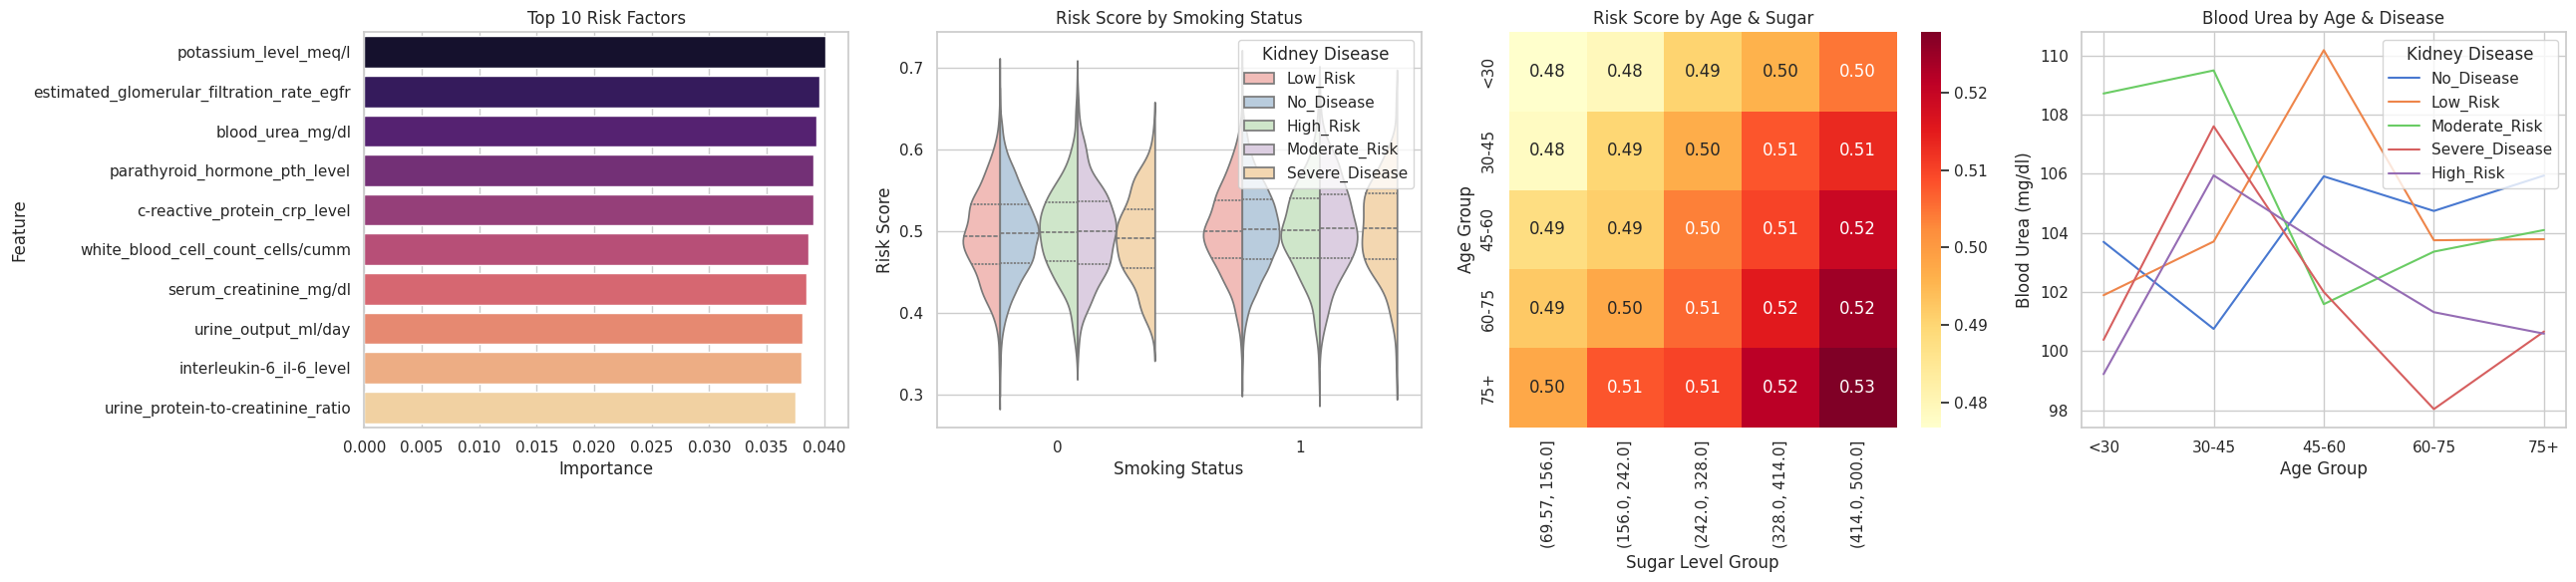

In [51]:
# Define target column
target_column: str = "target"

# Initialize and train model
analyzer = KidneyRiskAnalyzer(clean_df, target_column)
analyzer.train_model()

# Assign risk scores
scored_data = analyzer.assign_risk_scores()

# Prepare age/sugar bins for heatmap
scored_data['age_group'] = pd.cut(
    scored_data['age_of_the_patient'],
    bins=[0, 30, 45, 60, 75, 100],
    labels=["<30", "30-45", "45-60", "60-75", "75+"]
)

scored_data['sugar_level_group'] = pd.cut(
    scored_data['random_blood_glucose_level_mg/dl'],
    bins=5
)

pivot = scored_data.pivot_table(
    values='risk_score',
    index='age_group',
    columns='sugar_level_group',
    aggfunc='mean'
)

# Update age_group for clean_df used in line chart
clean_df['age_group'] = pd.cut(
    clean_df['age_of_the_patient'],
    bins=[0, 30, 45, 60, 75, 100],
    labels=["<30", "30-45", "45-60", "60-75", "75+"]
)

# Start combined figure with 4 subplots
fig, axes = plt.subplots(1, 4, figsize=(26, 6))

# --- Graph 1: Bar Plot (Top 10 Risk Factors) ---
importances = analyzer.compute_feature_importance().head(10)
sns.barplot(
    x=importances.values,
    y=importances.index,
    palette="magma",
    ax=axes[0]
)
axes[0].set_title("Top 10 Risk Factors")
axes[0].set_xlabel("Importance")
axes[0].set_ylabel("Feature")

# --- Graph 2: Violin Plot by Smoking ---
sns.violinplot(
    data=scored_data,
    x="smoking_status",
    y="risk_score",
    hue=target_column,
    split=True,
    inner="quart",
    palette="Pastel1",
    ax=axes[1]
)
axes[1].set_title("Risk Score by Smoking Status")
axes[1].set_xlabel("Smoking Status")
axes[1].set_ylabel("Risk Score")
axes[1].legend(title="Kidney Disease", loc='upper right')

# --- Graph 3: Heatmap by Age & Sugar ---
sns.heatmap(
    pivot,
    cmap="YlOrRd",
    annot=True,
    fmt=".2f",
    ax=axes[2]
)
axes[2].set_title("Risk Score by Age & Sugar")
axes[2].set_xlabel("Sugar Level Group")
axes[2].set_ylabel("Age Group")

# --- Graph 4: Lineplot by Age Group & Blood Urea ---
sns.lineplot(
    data=clean_df,
    x='age_group',
    y='blood_urea_mg/dl',
    hue='target',
    estimator='mean',
    errorbar=None,
    palette='muted',
    ax=axes[3]
)
axes[3].set_title("Blood Urea by Age & Disease")
axes[3].set_xlabel("Age Group")
axes[3].set_ylabel("Blood Urea (mg/dl)")
axes[3].legend(title='Kidney Disease', loc='upper right')

plt.tight_layout()
plt.show()


##  Kidney Disease Risk Visualization Analysis

#### Bar Chart: Top 10 Risk Factors

**1. Idea**  
To identify and prioritize the most influential clinical features contributing to kidney disease using Random Forest model feature importance.

**2. What does the graph interpret?**  
The bar chart ranks the top 10 features in descending order of importance based on how strongly they impact the model’s prediction of kidney disease risk.

**3. Key Takeaways**  
- Features like `blood_urea_mg/dl`, `serum_creatinine_mg/dl`, and `c-reactive protein` are top contributors.
- These metrics reflect kidney function directly, validating the model’s logic.
- Helps clinicians target the most significant biomarkers for early detection.

#### Violin Plot: Risk Score by Smoking Status

**1. Idea**  
To examine the impact of smoking behavior on kidney disease risk, comparing distributions across patients.

**2. What does the graph interpret?**  
The violin plot displays the distribution of risk scores for smokers and non-smokers, separated by disease status. Wider parts indicate a greater number of individuals with that risk level.

**3. Key Takeaways**  
- Smokers with kidney disease show a noticeably higher and broader risk score distribution.
- Non-smokers generally have lower risk scores.
- Suggests that smoking affects highly in the kidney diseases.


#### Heatmap: Heatmap of Risk Score by Age and Blood Sugar

**1. Idea**  
To explore how age and blood sugar levels (two accessible patient metrics) interact to affect risk.

**2. What does the graph interpret?**  
Each cell in the heatmap shows the average risk score for a group defined by a range of age and blood sugar levels.

**3. Key Takeaways**  
- Risk scores increase in older age groups (from 45 to 75+) and higher sugar levels.
- Highest risk scores are concentrated in the top-right quadrant: older individuals with high sugar levels.
- Useful for patient screening and early prevention strategies.


#### Line graph: Blood Urea by Age and Disease Status

**1. Idea**  
To illustrate how blood urea levels change with age and vary between those with and without kidney disease.

**2. What does the graph interpret?**  
The line plot tracks average blood urea for different age groups, with lines for disease status.

**3. Key Takeaways**  
- Blood urea increases significantly with age in patients with kidney disease.
- Disease-free patients maintain more stable levels.
- Suggests aging-related renal decline is exacerbated in disease cases.



# 7. Bonus

Model evaluation, prediction and comparision for risk of kidney health diseases.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

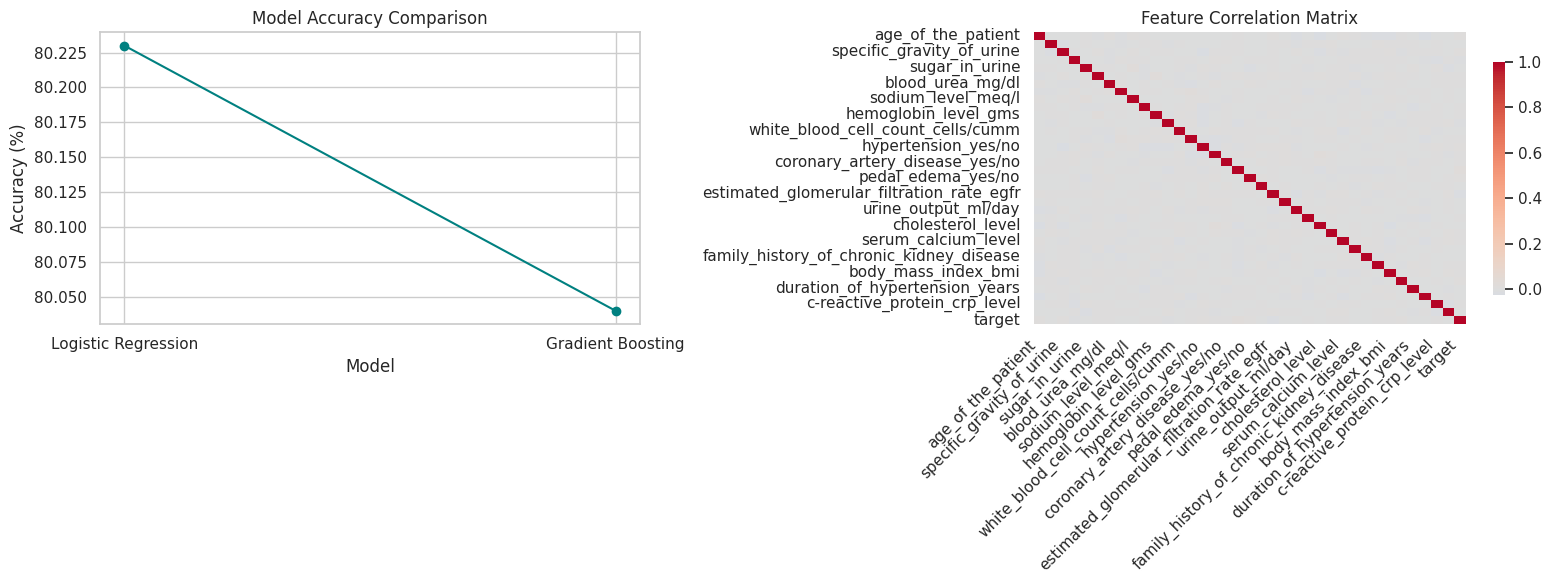

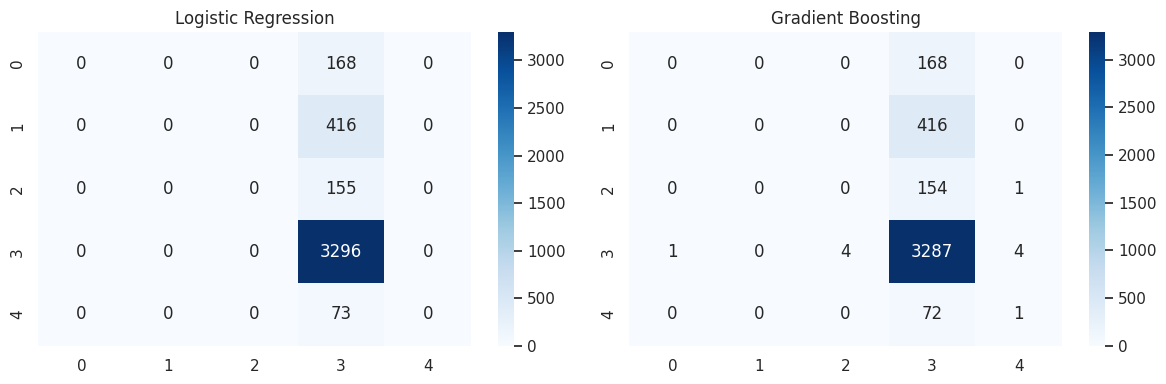


============================== Logistic Regression ==============================
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       168
           1       0.00      0.00      0.00       416
           2       0.00      0.00      0.00       155
           3       0.80      1.00      0.89      3296
           4       0.00      0.00      0.00        73

    accuracy                           0.80      4108
   macro avg       0.16      0.20      0.18      4108
weighted avg       0.64      0.80      0.71      4108


============================== Gradient Boosting ==============================
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       168
           1       0.00      0.00      0.00       416
           2       0.00      0.00      0.00       155
           3       0.80      1.00      0.89      3296
           4       0.17      0.01      0.03        73

    accuracy         

In [10]:
 # Train & evaluate models
kidney_classifier = KidneyClassifier(clean_df, target_column="target")
kidney_classifier.preprocess()
kidney_classifier.train_and_evaluate()

## Model Performance and Feature Correlation Analysis

### Model Accuracy Comparison

The graph on the left shows the accuracy of two models: Logistic Regression and Gradient Boosting. Both models performed well, with Logistic regression achieving a slightly higher accuracy, indicating better classification performance on the test set.

### Feature Correlation Matrix

The heatmap on the right displays correlations between features and the target variable. Strong positive or negative correlations highlight important predictors. For instance, features like `serum_creatinine_mg/dl` and `estimated_glomerular_filtration_rate_egfr` may show strong associations with the target, suggesting they are influential in predicting kidney disease status.

Understanding these correlations helps in feature selection and improving model interpretability.


# Conclusion

'Kidney Disease Prediction' project successfully developed a Kidney Disease Risk Analyzer using clinical and lifestyle data from 20,538 patients. A Random Forest model was trained to determine the most influential features affecting kidney health. Based on feature importance and normalized patient values, a risk scoring system was implemented to assess individual risk levels.

- Takeaways:

    - Useful in the accurate risk predictions.
    - Helps to identify top contributing factors on the kidney diseases.
    - Gives a scalable, data-driven approach to early kidney disease screening and risk prediction.

It will be useful for clinicians and health systems in proactive decision-making and personalized patient care.